In [1]:
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
from src import MO_DQN
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd

In [2]:
env = mo_gym.make('mo-circle-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "observation": {
        "type": "MultiAgentObservation",
        "observation_config": {
            "type": "Kinematics",
        }
    }
})
env.unwrapped.configure({
    "manual_control": True
})

obs, info = env.reset()

agent = MO_DQN.MO_DQN(env, num_objectives=2, seed=11, observation_space_shape=obs[0].shape, epsilon=0.1, replay_buffer_size=1000, batch_ratio=0.1,
                      objective_names=["speed_reward", "energy_reward"])
df = agent.train(200_000, target_update_frequency=10)
print(df)
df.to_csv("data/test_rewards_mo_normalised.csv")

Iterations: 100%|██████████| 200000/200000 [31:11<00:00, 106.84it/s]

      episode  speed_reward  energy_reward
0           0      1.966667      -4.720904
1           1      6.366667      -0.320865
2           2     -4.650000      -4.650000
3           3      8.683333      -4.737848
4           4     13.283333      -0.136550
...       ...           ...            ...
2212     2212      6.516667      -0.171131
2213     2213      6.516667      -0.171150
2214     2214     13.033333      -0.385086
2215     2215     13.033333      -0.385588
2216     2216     -0.100000      -0.100000

[2217 rows x 3 columns]


In [3]:
df = pd.read_csv("data/test_rewards_mo_normalised.csv")
df["episode"] = df["episode"]+1
display(df)

,Unnamed: 0,episode,speed_reward,energy_reward
0,0,1,1.966667,-4.720904
1,1,2,6.366667,-0.320865
2,2,3,-4.650000,-4.650000
3,3,4,8.683333,-4.737848
4,4,5,13.283333,-0.136550
...,...,...,...,...
2212,2212,2213,6.516667,-0.171131
2213,2213,2214,6.516667,-0.171150
2214,2214,2215,13.033333,-0.385086
2215,2215,2216,13.033333,-0.385588


,Unnamed: 0,episode,speed_reward,energy_reward,moving_average_speed,moving_average_energy
0,0,1,1.966667,-4.720904,1.966667,-4.720904
1,1,2,6.366667,-0.320865,4.166667,-2.520884
2,2,3,-4.650000,-4.650000,1.227778,-3.230590
3,3,4,8.683333,-4.737848,3.091667,-3.607404
4,4,5,13.283333,-0.136550,5.130000,-2.913233
...,...,...,...,...,...,...
2212,2212,2213,6.516667,-0.171131,7.942951,-0.618442
2213,2213,2214,6.516667,-0.171150,7.942307,-0.618240
2214,2214,2215,13.033333,-0.385086,7.944605,-0.618134
2215,2215,2216,13.033333,-0.385588,7.946901,-0.618029


<Axes: xlabel='episode'>

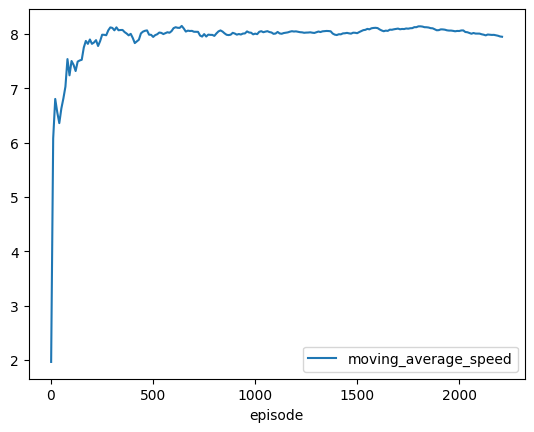

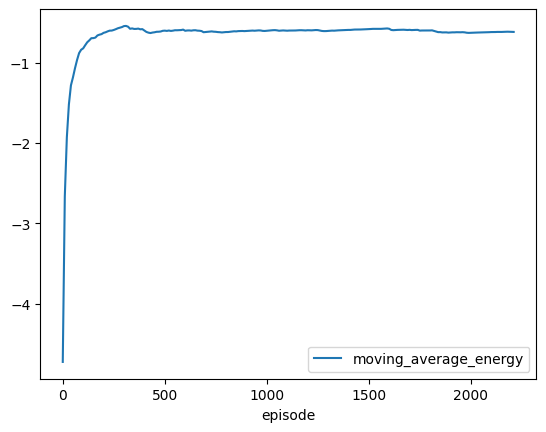

In [4]:
df["moving_average_speed"] = df["speed_reward"].cumsum()/(df["episode"])
df["moving_average_energy"] = df["energy_reward"].cumsum()/(df["episode"])

display(df)
df.iloc[::10].plot.line(x="episode", y="moving_average_speed")
df.iloc[::10].plot.line(x="episode", y="moving_average_energy")